In [2]:
%pip install qiskit --quiet
%pip install qiskit-aer --quiet
%pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import numpy as np
#Let's go ahead and specifically import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram

How many qubits for the input register? 3
[1 1 0 0]


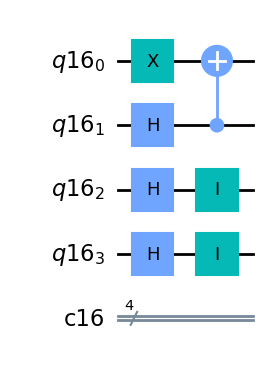

In [29]:
import qiskit
import numpy
n = int(input("How many qubits for the input register? "))
q = QuantumRegister(n+1)
c = ClassicalRegister(n+1)
qc = qiskit.QuantumCircuit(q, c)
a = numpy.zeros(n+1, dtype=int)
for i in range(n+1):
  a[i] = numpy.random.randint(0,2)

# making the state
qc.x(0)
for i in range(1,n+1):
  qc.h(i)


# apply oracle
for i in range(1,n+1):
  if a[i] == 1:
    qc.cx(i, 0)
  elif a[i] == 0:
    qc.i(i)
print(a)
qc.draw('mpl')

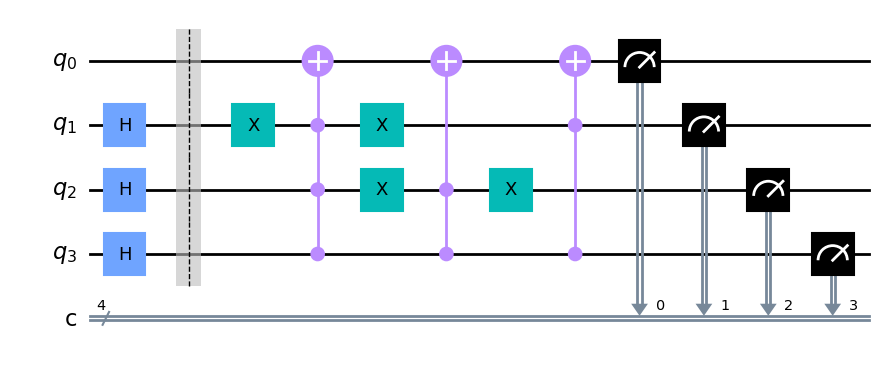

In [46]:
prob4 = QuantumCircuit(4,4)

for i in range(1,4):
  prob4.h(i)
prob4.barrier()
prob4.x(1)
prob4.mcx([1,2,3], 0)
prob4.x(1)
prob4.x(2)
prob4.mcx([2,3], 0)
prob4.x(2)
prob4.mcx([1,3], 0)
for i in range(0,4):
  prob4.measure(i,i)


prob4.draw('mpl')

{'1001': 134, '1010': 119, '1111': 116, '0000': 112, '0010': 143, '0100': 136, '1101': 128, '0110': 136}


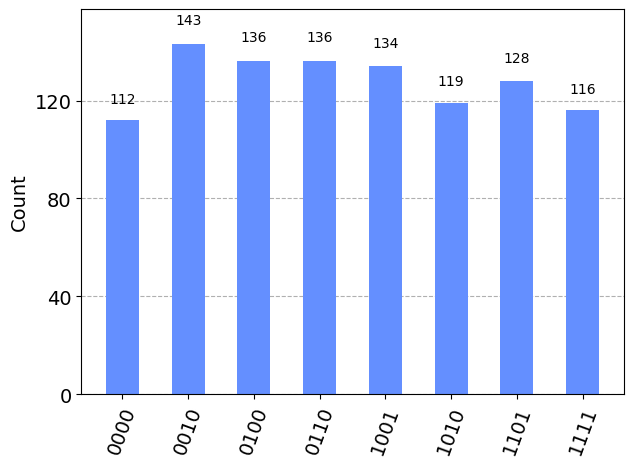

In [47]:
counts = execute(prob4, backend = Aer.get_backend('qasm_simulator'), shots=1024).result().get_counts(prob4)
print(counts)
plot_histogram(counts)